# Problem 1

1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.
4

1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.
7

1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.
4

1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)
4

1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)
4

1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.
7

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)
7

1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.
5

# Problem 2

## Load Dataset

In [3]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\lsreeram\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [4]:
# Display the file ids of all the files available.
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [5]:
# Retrieve the raw text of the speeches
roosevelt_speech = inaugural.raw('1941-Roosevelt.txt')
kennedy_speech = inaugural.raw('1961-Kennedy.txt')
nixon_speech = inaugural.raw('1973-Nixon.txt')

In [6]:
# Tokenize the speeches into words
roosevelt_words = inaugural.words('1941-Roosevelt.txt')
kennedy_words = inaugural.words('1961-Kennedy.txt')
nixon_words = inaugural.words('1973-Nixon.txt')

2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)
3

In [8]:
# Calculate the number of characters
roosevelt_chars_raw_count = len(roosevelt_speech)
kennedy_chars_raw_count = len(kennedy_speech)
nixon_chars_raw_count = len(nixon_speech)

In [9]:
# Calculate the number of words
roosevelt_words_raw_count = len(roosevelt_words)
kennedy_words_raw_count = len(kennedy_words)
nixon_words_raw_count = len(nixon_words)

In [10]:
# Calculate the number of sentences
roosevelt_sents_raw_count = len(inaugural.sents('1941-Roosevelt.txt'))
kennedy_sents_raw_count = len(inaugural.sents('1961-Kennedy.txt'))
nixon_sents_raw_count = len(inaugural.sents('1973-Nixon.txt'))

In [12]:
# Print the results
print("1941-Roosevelt.txt:")
print("Characters:", roosevelt_chars_raw_count)
print("Words:", roosevelt_words_raw_count)
print("Sentences:", roosevelt_sents_raw_count)
print()

print("1961-Kennedy.txt:")
print("Characters:", kennedy_chars_raw_count)
print("Words:", kennedy_words_raw_count)
print("Sentences:", kennedy_sents_raw_count)
print()

print("1973-Nixon.txt:")
print("Characters:", nixon_chars_raw_count)
print("Words:", nixon_words_raw_count)
print("Sentences:", nixon_sents_raw_count)


1941-Roosevelt.txt:
Characters: 7571
Words: 1536
Sentences: 68

1961-Kennedy.txt:
Characters: 7618
Words: 1546
Sentences: 52

1973-Nixon.txt:
Characters: 9991
Words: 2028
Sentences: 69


In [ ]:
Words length average, number of words above certain average, word length average

2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.
3

In [14]:
# Download stopwords if not already downloaded
from nltk.corpus import stopwords
#nltk.download('stopwords')
import string # this is used for string manipulations

In [15]:
# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define the stopwords and punctuations to be removed
stopwords_set = set(stopwords.words('english'))
punctuations_set = set(string.punctuation) | set(['--', "``", "''"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lsreeram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Remove stopwords from the speeches
roosevelt_words_filtered = [word for word in roosevelt_words if word.lower() not in stopwords_set and word not in punctuations_set]
kennedy_words_filtered = [word for word in kennedy_words if word.lower() not in stopwords_set and word not in punctuations_set]
nixon_words_filtered = [word for word in nixon_words if word.lower() not in stopwords_set and word not in punctuations_set]

In [20]:
# Find the total number of words after removing stopwords
roosevelt_words_total = len(roosevelt_words_filtered)
kennedy_words_total = len(kennedy_words_filtered)
nixon_words_total = len(nixon_words_filtered)

print("Roosevelt words count before and after removing stopwords are :",  roosevelt_words_raw_count, '&' , roosevelt_words_total, 'resepctively.')
print("Kennedy words count before and after removing stopwords are :", kennedy_words_raw_count , '&',kennedy_words_total,'resepctively.')
print("Nixon words count before and after removing stopwords are :", nixon_words_raw_count, '&', nixon_words_total,'resepctively.')

Roosevelt words count before and after removing stopwords are : 1536 & 632 resepctively.
Kennedy words count before and after removing stopwords are : 1546 & 697 resepctively.
Nixon words count before and after removing stopwords are : 2028 & 836 resepctively.


In [44]:
# Get a sample sentence after removing stopwords
sample_sentence_roosevelt = " ".join(roosevelt_words_filtered[:20])  # Taking first 20 words
sample_sentence_kennedy = " ".join(kennedy_words_filtered[:20])  # Taking first 20 words
sample_sentence_nixon = " ".join(nixon_words_filtered[:20])  # Taking first 20 words

# Print sample sentences
print("Sample sentence after removing stopwords (1941-Roosevelt.txt):")
print(sample_sentence_roosevelt)
print()

print("Sample sentence after removing stopwords (1961-Kennedy.txt):")
print(sample_sentence_kennedy)
print()

print("Sample sentence after removing stopwords (1973-Nixon.txt):")
print(sample_sentence_nixon)

Sample sentence after removing stopwords (1941-Roosevelt.txt):
national day inauguration since 1789 people renewed sense dedication United States Washington day task people create weld together nation Lincoln

Sample sentence after removing stopwords (1961-Kennedy.txt):
Vice President Johnson Mr Speaker Mr Chief Justice President Eisenhower Vice President Nixon President Truman reverend clergy fellow citizens observe

Sample sentence after removing stopwords (1973-Nixon.txt):
Mr Vice President Mr Speaker Mr Chief Justice Senator Cook Mrs Eisenhower fellow citizens great good country share together met



2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)
3

In [45]:
from collections import Counter

In [46]:
# Calculate the frequency distribution of words
roosevelt_freq_dist = Counter(roosevelt_words_filtered)
kennedy_freq_dist = Counter(kennedy_words_filtered)
nixon_freq_dist = Counter(nixon_words_filtered)

In [47]:
# Retrieve the most common words
roosevelt_top_words = roosevelt_freq_dist.most_common(3)
kennedy_top_words = kennedy_freq_dist.most_common(3)
nixon_top_words = nixon_freq_dist.most_common(3)

In [48]:
# Print the results
print("1941-Roosevelt.txt:")
for word, count in roosevelt_top_words:
    print(word, ":", count)
print()

print("1961-Kennedy.txt:")
for word, count in kennedy_top_words:
    print(word, ":", count)
print()

print("1973-Nixon.txt:")
for word, count in nixon_top_words:
    print(word, ":", count)

1941-Roosevelt.txt:
know : 10
spirit : 9
life : 9

1961-Kennedy.txt:
us : 12
world : 8
Let : 8

1973-Nixon.txt:
us : 26
America : 21
peace : 19


2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)
3

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#--pip install wordcloud

In [51]:
# Create word clouds
roosevelt_wordcloud = WordCloud(width=800, height=400).generate(' '.join(roosevelt_words_filtered))
kennedy_wordcloud = WordCloud(width=800, height=400).generate(' '.join(kennedy_words_filtered))
nixon_wordcloud = WordCloud(width=800, height=400).generate(' '.join(nixon_words_filtered))

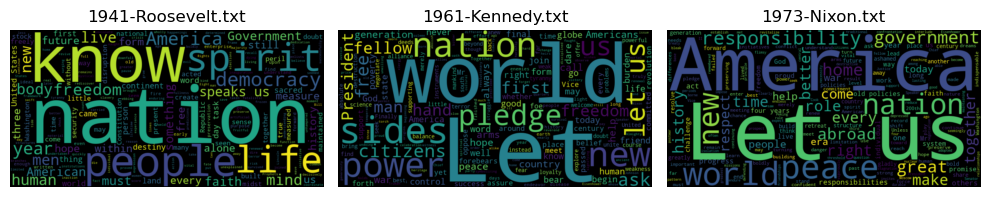

In [52]:
# Plot the word clouds
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(roosevelt_wordcloud, interpolation='bilinear')
plt.title('1941-Roosevelt.txt')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(kennedy_wordcloud, interpolation='bilinear')
plt.title('1961-Kennedy.txt')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(nixon_wordcloud, interpolation='bilinear')
plt.title('1973-Nixon.txt')
plt.axis('off')

plt.tight_layout()
plt.show()

# Refelction Report

Please reflect on all that you learnt and fill this reflection: https://docs.google.com/forms/d/e/1FAIpQLSfqHHlmJyUkniiBiejtudIuRFk_TVCLe843wfX6Iu3QNRPmng/viewform?usp=sf_link

# Rough